# TASK 1

- Data Collection:

Use a labeled dataset with emails marked as "Spam" or "Ham."

**Example:** The Enron email dataset.

Convert email text to lowercase.
Remove unnecessary characters (punctuation, numbers, special symbols).
Tokenize text into words.
Remove stopwords (common but unimportant words like "the", "and").
Apply stemming or lemmatization to reduce words to their base forms.

- Feature Extraction:

Represent text as numerical features using Bag of Words or TF-IDF vectorization.
- Model Training:

Use Multinomial Naïve Bayes to train on the extracted features.
- Evaluation:

Split data into training and test sets.
Evaluate performance using metrics like accuracy, precision, recall, and F1-score.
- Challenges:

Handling imbalanced datasets (spam is often less frequent than ham).

It is hard to Differentiate between True promotional emails and spam.

# TAsk 2 (Ecommerce Sentiment Analysis)

In [35]:
!pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.7 MB ? eta -:--:--
   ----------- ---------------------------- 1.3/4.7 MB 3.5 MB/s eta 0:00:01
   ---------------------- ----------------- 2.6/4.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------- ----------- 3.4/4.7 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 4.2/4.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 4.7/4.7 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=ae1b8ecc83fe829b30f6c0c0bf66b9338fbd94c7df0eb4f92221fcf7ed71734

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_rough=pd.read_csv("Clothing E-Commerce Reviews.csv",index_col=False)
column_contain=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']

In [43]:
df=pd.DataFrame(data=df_rough,columns=column_contain)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [45]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal wi...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will...",5,1,0,General,Dresses,Dresses


In [47]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


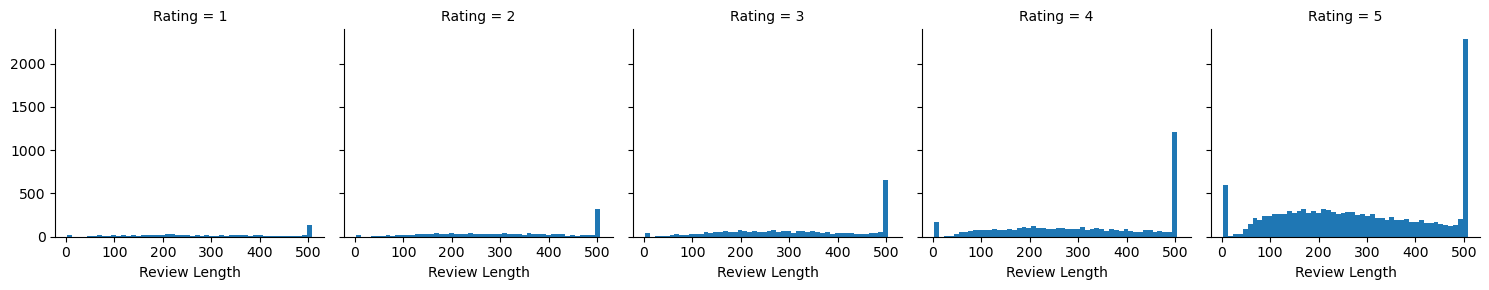

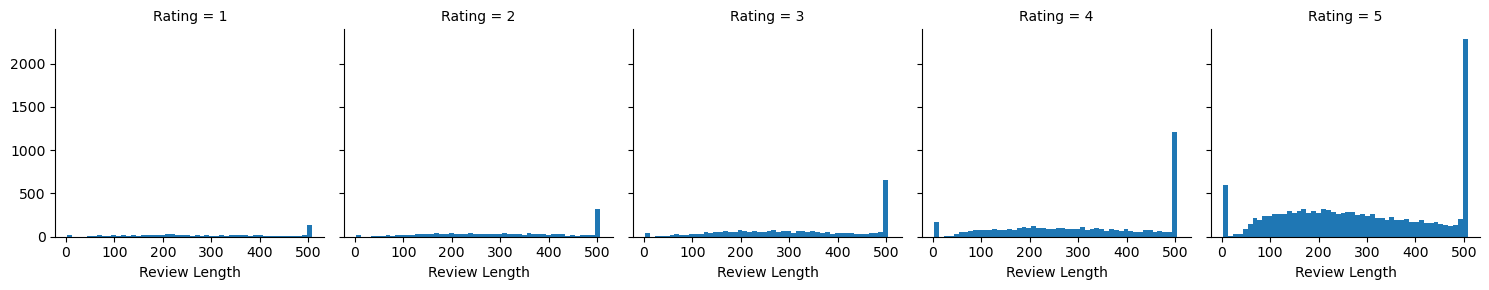

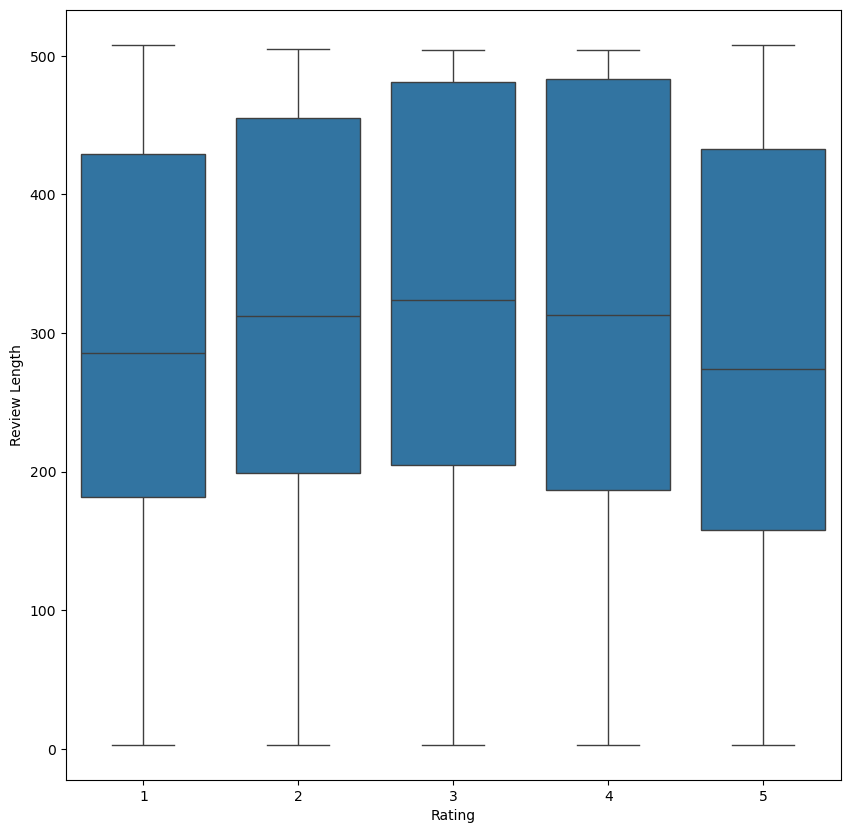

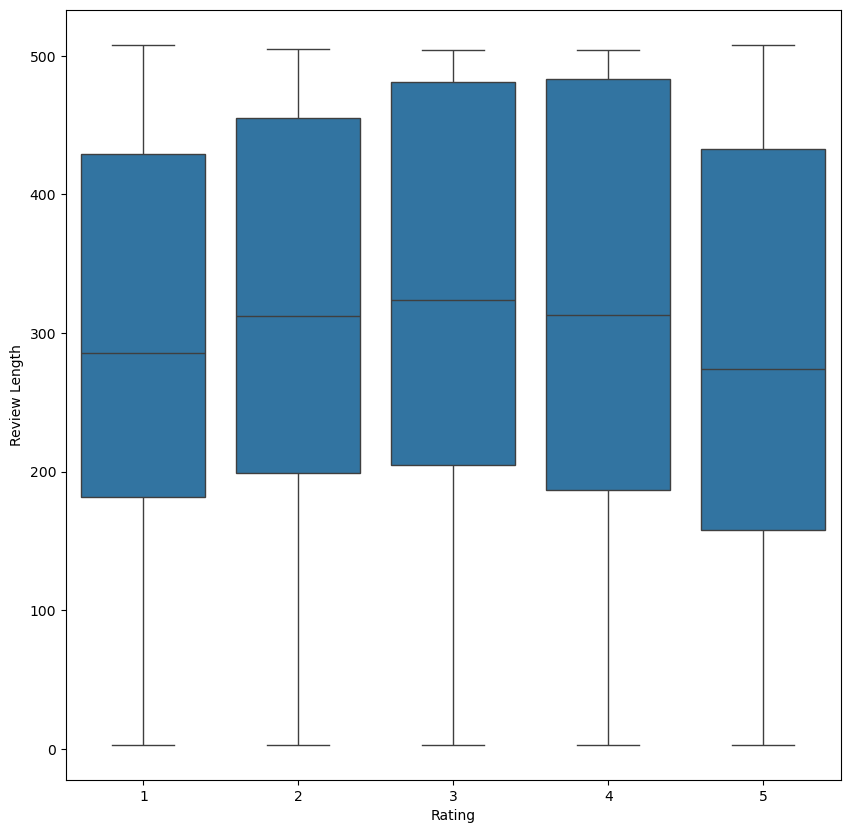

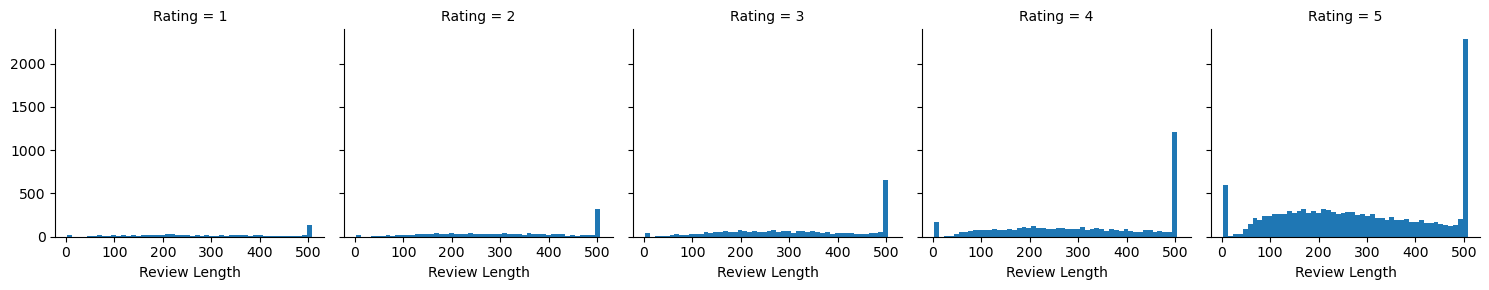

In [57]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)
plt.show()

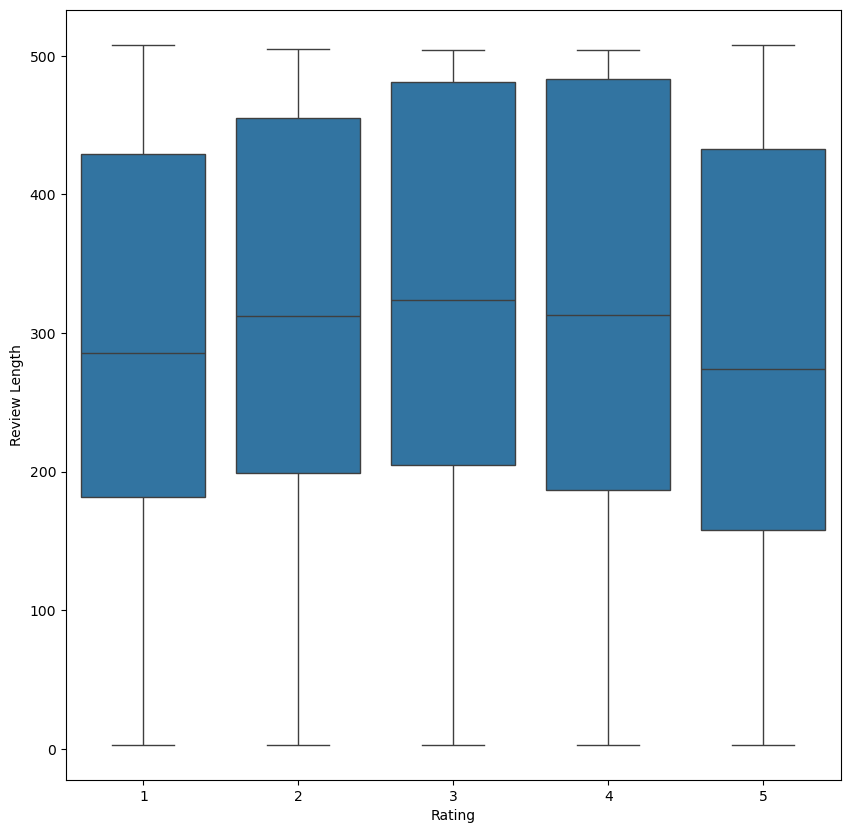

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=df)
plt.show()

In [69]:
numeric_cols = df.select_dtypes(include=np.number)
rating = df.groupby('Rating')[numeric_cols.columns].mean()

correlation = rating.corr()

correlation

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.217400,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.010781,0.115681,-0.194958,-0.930949
Rating,-0.217400,0.010781,1.000000,0.956058,-0.953056,-0.283747
Recommended IND,-0.303355,0.115681,0.956058,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.953056,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.283747,-0.307808,0.384312,1.000000


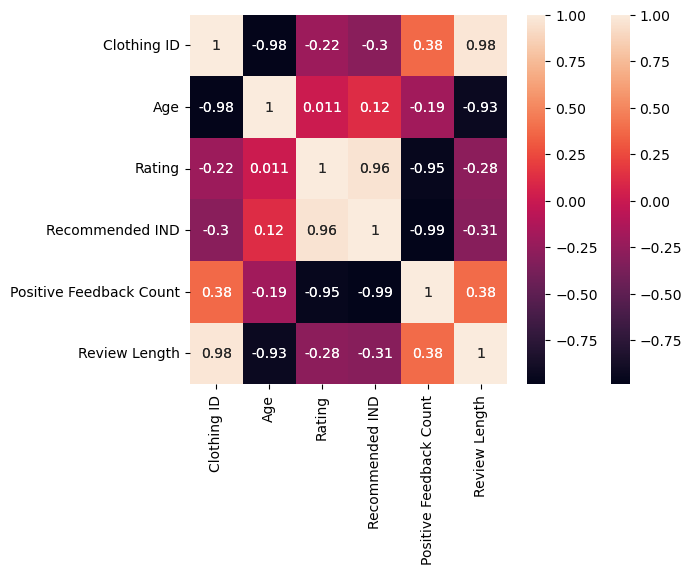

In [73]:
sns.heatmap(rating.corr(), annot= True)
plt.show()

C:\Users\worka\AppData\Local\Temp\ipykernel_24340\805932586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\


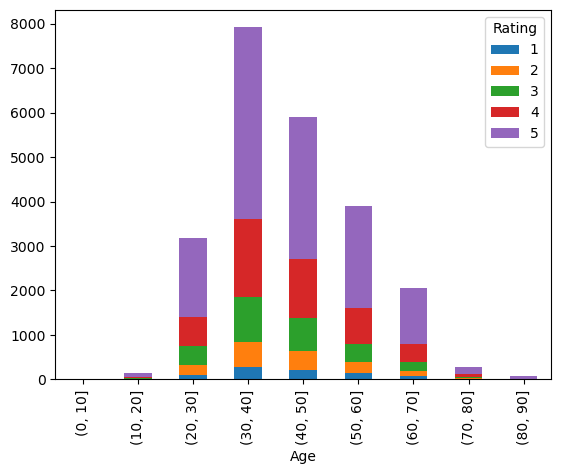

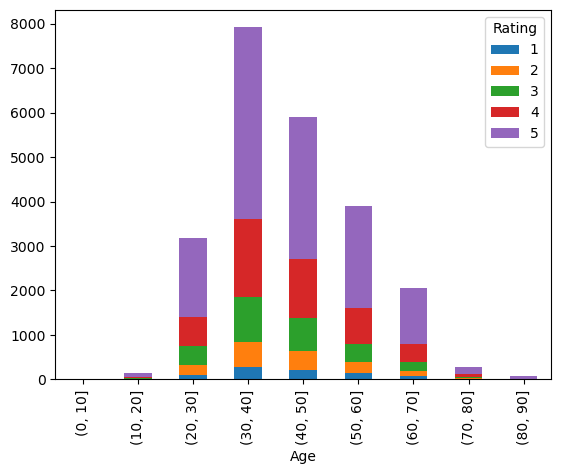

In [77]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)
plt.show()

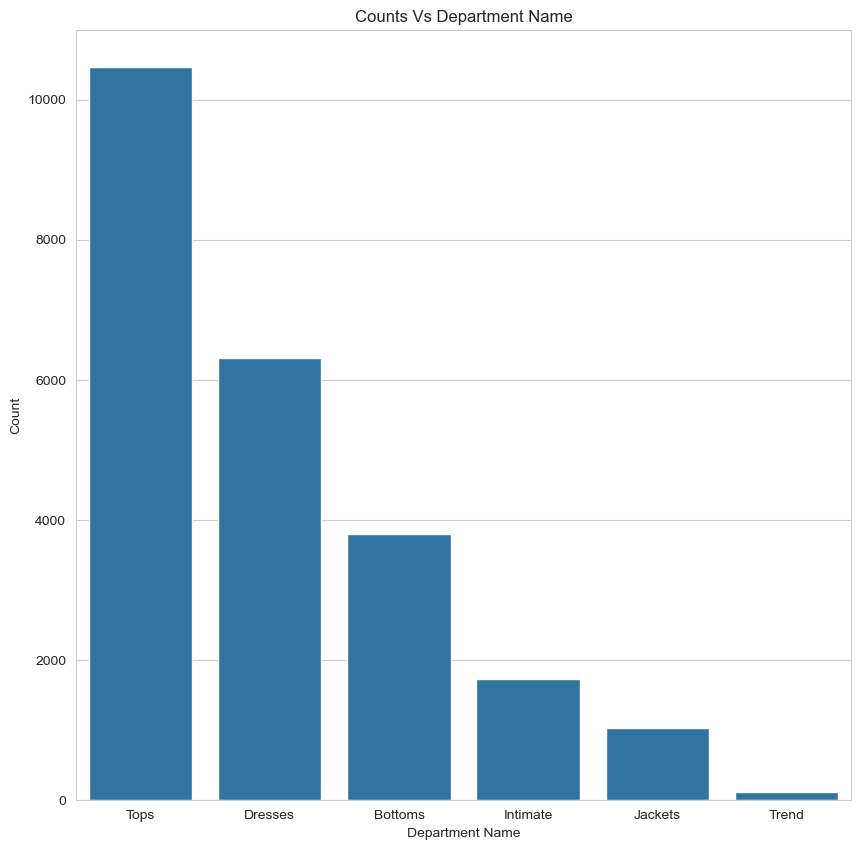

In [79]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")
plt.show()

In [81]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [95]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\worka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [97]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [99]:
print(len(bow_transformer.vocabulary_))

13953


In [101]:
X_review = bow_transformer.transform(X_review)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [107]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [109]:
predict=nb.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  65  149]
 [  11 3240]]


              precision    recall  f1-score   support

           1       0.86      0.30      0.45       214
           5       0.96      1.00      0.98      3251

    accuracy                           0.95      3465
   macro avg       0.91      0.65      0.71      3465
weighted avg       0.95      0.95      0.94      3465



In [113]:
rating_positive=df['Review Text'][16]
rating_positive

"Material and color is nice.  the leg opening is very large.  i am 5'1 (100#) and the length hits me right above my ankle.  with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look.  if you are at least average height or taller, this may look good on you."

In [115]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5

In [117]:
rating_negative=df['Review Text'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [119]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1

In [121]:
X_predict_recommend=df['Review Text']
y_recommend=df['Recommended IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 603  454]
 [ 242 4600]]


              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1057
           1       0.91      0.95      0.93      4842

    accuracy                           0.88      5899
   macro avg       0.81      0.76      0.78      5899
weighted avg       0.87      0.88      0.88      5899



In [123]:
rating_positive

"Material and color is nice.  the leg opening is very large.  i am 5'1 (100#) and the length hits me right above my ankle.  with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look.  if you are at least average height or taller, this may look good on you."

In [125]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

1

In [127]:
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [129]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

0